<a href="https://colab.research.google.com/github/Fatikhaaa/product-recomendation-system/blob/main/MLT_Recomendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Akhir Machine Learning Terapan - Recomendation System**

- **Nama:** Fatikha Hudi Aryani
- **Email:** fatikhahudiaryani621@gmail.com
- **ID Dicoding:** fatikha_hudi_aryani

# **1. Import Library**

In [1]:
# Import Library yang dibutuhkan
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers

from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support

# **2. Data Loading**

Dataset yang akan dipakai dalam proyek ini diambil dari platform [Kaggle](https://www.kaggle.com/datasets/ibrahimhafizhan/sociolla-all-brands-products-catalog). Maka dari itu untuk dapat mengambil dataset dari Kaggle, perlu dilakukan konfigurasi kredensial API Kaggle di Google Colab. Kaggle menyediakan API yang memungkinkan akses langsung ke dataset tanpa perlu mengunduhnya secara manual.
Proses ini dilakukan dengan mengunggah file kaggle.json yang berisi kredensial API yang diunduh dari halaman akun Kaggle.

In [2]:
# Memuat data
from google.colab import files
files.upload()  # Pilih file kaggle.json yang sudah didownload

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatikhaa","key":"80e7ab5ae1b4145831f9f1afa82d4bbd"}'}

In [3]:
# Konfigurasi akses ke API Kaggle dari google colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Atur permission

In [4]:
!kaggle datasets list  # Cek apakah bisa mengakses API

ref                                                            title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance           Student Habits vs Academic Performance                19512  2025-04-12 10:49:08.663000          35240        628  1.0              
adilshamim8/social-media-addiction-vs-relationships            Students' Social Media Addiction                       7851  2025-05-10 14:38:02.713000           7805        114  1.0              
khushikyad001/cigarettes-and-alcohol-addiction                 Cigarettes & Alcohol Addiction                       134636  2025-05-15 14:03:28.250000           1490         29  1.0              
atharvasoundankar/ai

In [5]:
# Download dataset dari kaggle dan unzip file
!kaggle datasets download -d ibrahimhafizhan/sociolla-all-brands-products-catalog
!unzip sociolla-all-brands-products-catalog.zip

Dataset URL: https://www.kaggle.com/datasets/ibrahimhafizhan/sociolla-all-brands-products-catalog
License(s): other
  0% 0.00/638k [00:00<?, ?B/s]
100% 638k/638k [00:00<00:00, 563MB/s]
Archive:  sociolla-all-brands-products-catalog.zip
  inflating: products_all_brands.csv  


Dengan kredensial yang telah diunggah, code **!kaggle datasets download -d ibrahimhafizhan/sociolla-all-brands-products-catalog** digunakan untuk mengunduh dataset yang berjudul "sociolla-all-brands-products-catalog" dari Kaggle.

Kemudian file yang telah diunduh dalam format ZIP diekstrak menggunakan perintah **!unzip sociolla-all-brands-products-catalog.zip** dengan tujuan untuk mengakses file data dalam format CSV yang ada di dalamnya.

Lalu, ubah dataset yang telah berhasil diunduh dalam format CSV ke dalam variabel DataFrame.

In [6]:
# Baca file CSV
products = pd.read_csv('products_all_brands.csv')

# **3. Data Understanding**

In [7]:
# Menampilkan dataset teratas
products.head()

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,rating_types_str,average_rating,total_reviews,average_rating_by_types,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
0,796_3ce,MULTI EYE COLOR PALETTE,97802,130,Rp 555.000 - Rp 687.000,NaN,https://www.sociolla.com/eyeshadow/69460-phan-...,2022-10-03T03:30:06.681Z,Eyeshadow,Makeup; Eyes; Eyeshadow,is_star_long_wear;is_star_packaging;is_star_pi...,4.920000,5,"""star_long_wear"": 5; ""star_packaging"": 4.8; ""s...",5,0,0,5,717
1,796_3ce,VELVET LIP TINT,97810,50,Rp 264.000,NaN,https://www.sociolla.com/lip-cream/69468-son-k...,2022-10-03T03:02:40.340Z,Lip Cream,Makeup; Lips; Lip Cream,is_star_long_wear;is_star_packaging;is_star_pi...,4.576190,42,"""star_long_wear"": 4.309523809523809; ""star_pac...",42,10,2,30,682
2,796_3ce,LIP COLOR,97822,60,Rp 317.000,NaN,https://www.sociolla.com/lip-matte/69480-son-t...,2023-05-30T09:49:15.158Z,Lipstick,Makeup; Lips; Lipstick,is_star_long_wear;is_star_packaging;is_star_pi...,0.000000,0,NaN,0,0,0,0,173
3,796_3ce,MINI MULTI EYE COLOR PALETTE,97833,80,Rp 423.000,NaN,https://www.sociolla.com/eyeshadow/69491-phan-...,2022-10-03T03:27:01.334Z,Eyeshadow,Makeup; Eyes; Eyeshadow,is_star_long_wear;is_star_packaging;is_star_pi...,4.883333,6,"""star_long_wear"": 4.916666666666667; ""star_pac...",12,1,0,11,257
4,796_3ce,FACE BLUSH,97801,60,Rp 300.000,NaN,https://www.sociolla.com/blush/69459-phan-ma-h...,2022-10-03T03:22:26.610Z,Blush,Makeup; Face; Blush,is_star_long_wear;is_star_packaging;is_star_pi...,4.858824,13,"""star_long_wear"": 4.9411764705882355; ""star_pa...",17,2,0,15,387


In [8]:
# Menampilkan jumlah row dan column (ukuran shape)
products.shape

(7636, 19)

Dari hasil keluaran diatas dapat dilihat bahwa dataset terdiri dari 7636 baris dan 19 kolom.

In [9]:
# Menampilkan informasi mengenai dataset
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7636 entries, 0 to 7635
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand_name                    7636 non-null   object 
 1   product_name                  7636 non-null   object 
 2   product_id                    7636 non-null   int64  
 3   beauty_point_earned           7636 non-null   int64  
 4   price_range                   7636 non-null   object 
 5   price_by_combinations         4087 non-null   object 
 6   url                           7636 non-null   object 
 7   active_date                   5534 non-null   object 
 8   default_category              7636 non-null   object 
 9   categories                    7632 non-null   object 
 10  rating_types_str              7561 non-null   object 
 11  average_rating                7636 non-null   float64
 12  total_reviews                 7636 non-null   int64  
 13  ave

Berikut ini detail dari masing-masing variabel dataset:

- brand_name : id dan merek atau nama brand dari tiap produk, yang dipisahkan dengan garis bawah
- product_name : nama produk
- product_id : id produk
- beauty_point_earned : poin kecantikan yang diperoleh melalui pembelian
- price_range : kisaran umum harga produk
- price_by_combinations : kisaran khusus harga produk berdasarkan variasi produk yang berbeda
- url : URL link yang mengarahkan pada laman Sociolla.com
- active_date : Informasi tentang tanggal setiap produk menjadi aktif atau tersedia di Sociolla.com
- default_category : Kategori umum produk
- categories : Kategori khusus produk, untuk klasifikasi produk terperinci
- rating_types_str : Uasan konsumen tiap produk
- average_rating : Rata-rata rating penilaian produk
- total_reviews : Total konsumen yang memberikan ulasan
- average_rating_by_types : Rata-rata rating penilaian produk dalam aspek tertentu
- total_recommended_count : Total konsumen yang merekomendasikan produk
- total_repurchase_maybe_count : Total konsumen yang mungkin membeli produk ulang
- total_repurchase_no_count : Total konsumen yang tidak membeli produk ulang
- total_repurchase_yes_count : Total konsumen yang membeli produk ulang
- total_in_wishlist : Total konsumen yang memasukkan produk ke dalam wishlist

Variabel default_category, average_rating, dan total_recommended_count akan digunakan pada model rekomendasi. Sedangkan, variabel brand_name, product_name, dan price_range untuk melihat output yang dihasilkan.

In [10]:
# Memeriksa missing value
products.isnull().sum()

,0
brand_name,0
product_name,0
product_id,0
beauty_point_earned,0
price_range,0
price_by_combinations,3549
url,0
active_date,2102
default_category,0
categories,4


Terlihat dari informasi diatas, terdapat missing value pada kolom activate_date, rating_types_str, dan average_rating_by_types. Sehingga untuk tahap selanjutnya perlu dilakukan pananganan missing value.

In [11]:
# Memeriksa data duplikat
product_duplicate = products.duplicated().sum()
print(f"Jumlah baris duplikat: {product_duplicate}")

Jumlah baris duplikat: 0


Terlihat dari outputnya menampilkan bahwa tidak ada data duplikat, sehingga tidak perlu dilakukan penanganan data duplikat.

In [12]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
products.describe()

,product_id,beauty_point_earned,average_rating,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
count,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000
mean,82903.974725,37.236773,3.517905,198.197617,186.560503,40.603457,15.479963,141.873494,633.016108
std,27257.173650,46.056962,2.000138,852.067365,803.185318,169.473278,79.716058,625.673542,2055.067002
min,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-317.000000
25%,75267.000000,10.000000,3.910714,1.000000,1.000000,0.000000,0.000000,0.000000,28.000000
50%,91856.500000,20.000000,4.576923,9.000000,9.000000,2.000000,0.000000,6.000000,132.000000
75%,101825.500000,50.000000,4.738155,76.000000,71.000000,17.000000,6.000000,52.000000,480.000000
max,109155.000000,610.000000,5.000000,21536.000000,20804.000000,5025.000000,2824.000000,17653.000000,58568.000000


# **4. Exploratory Data Analysis (EDA)**

Selanjutnya, akan dilakukan proses analisis data dengan teknik Univariate Analysis dan Multivariate Analysis.

## **Univariate Analysis**

### **Analisis Jumlah Nilai Unik**

In [13]:
# Menampilkan dan menghitung Jumlah Nilai Unik di DataFrame
print('Jumlah product_id: ', len(products.product_id.unique()))
print('Jumlah brand_name: ', len(products.brand_name.unique()))
print('Jumlah data average_rating: ', len(products.average_rating.unique()))
print('Jumlah data default_category: ', len(products.default_category.unique()))

Jumlah product_id:  7636
Jumlah brand_name:  321
Jumlah data average_rating:  3187
Jumlah data default_category:  195


Dengan fungsi unique(), dapat diketahui jika dataaset terdiri dari 7636 nama produk yang berbeda, 319 nama brand yang berbeda, 3187 nilai rating yang berbeda, dan 195 kategori produk yang berbeda

### **Analisis Distribusi Rating Produk**

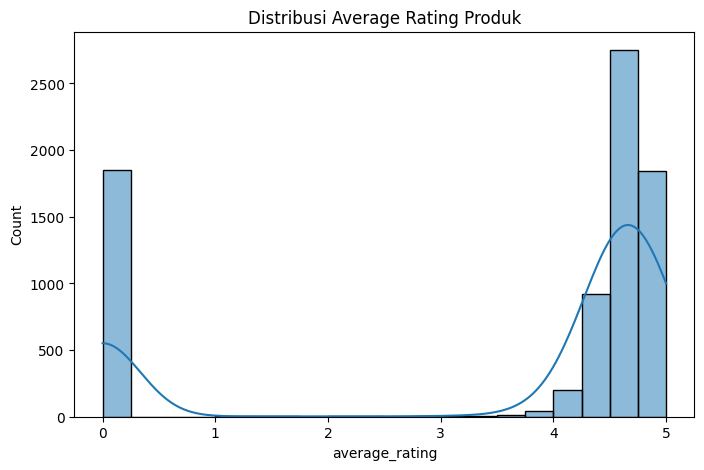

In [14]:
# Distribusi rating
plt.figure(figsize=(8, 5))
sns.histplot(products['average_rating'], bins=20, kde=True)
plt.title("Distribusi Average Rating Produk")
plt.show()

Sebagian besar produk memiliki rating tinggi (4-5), menunjukkan kepuasan pelanggan yang baik. Hanya sedikit produk yang mendapat rating rendah (0-3), yang mungkin memerlukan evaluasi lebih lanjut. Distribusi ini mengindikasikan bahwa sebagian besar produk diterima dengan baik oleh pelanggan.

### **Analisis Kategori Produk**

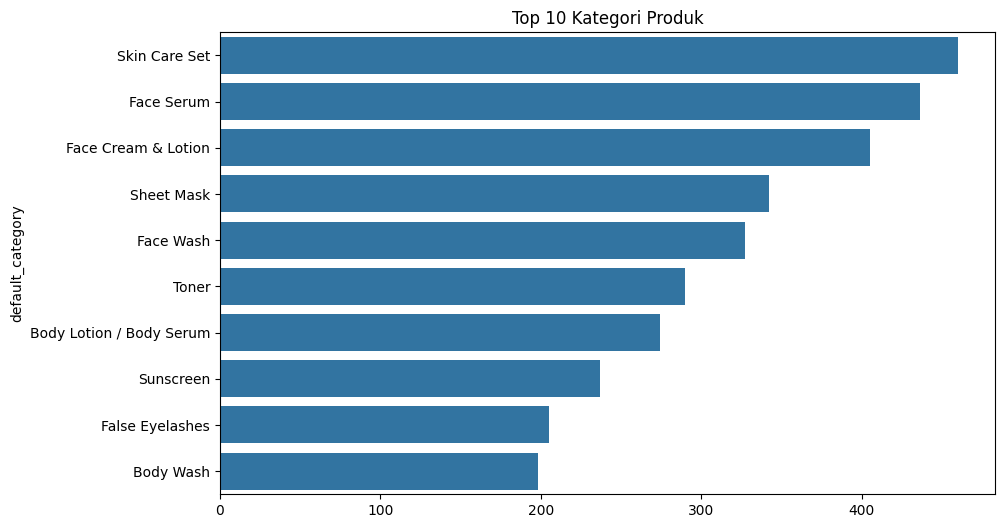

In [15]:
# Top 10 kategori produk
top_categories = products['default_category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 Kategori Produk")
plt.show()

Berdasarkan analisa kategori produk, terlihat bahwa daftar kategori produk yang paling dominan untuk rekomendasi Content-Based Filtering menunjukkan seperti yang ada di visualisasi barplot diatas meliputi : Skin Care Set, Face Serum, Face Cream & Lotion, Sheet Mask, Face Wash, Toner, Body Lotion/Body Serum, Sunscreen, False Eyelash, dan Body Wash.

### **Analisis Sentimen dari Rekomendasi & Repurchase**

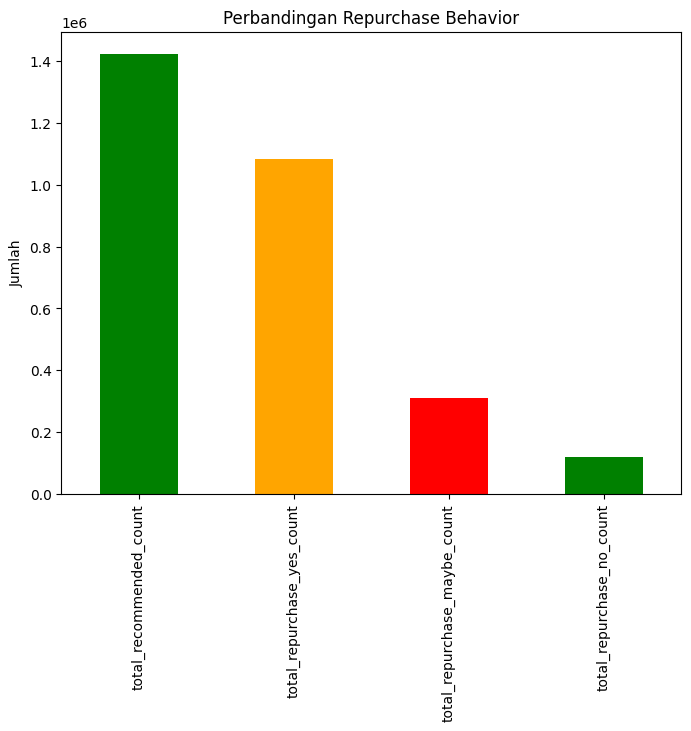

In [16]:
# Perbandingan repurchase (yes/maybe/no)
repurchase_data = products[['total_recommended_count','total_repurchase_yes_count', 'total_repurchase_maybe_count', 'total_repurchase_no_count']].sum()
plt.figure(figsize=(8, 6))
repurchase_data.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Perbandingan Repurchase Behavior")
plt.ylabel("Jumlah")
plt.show()

Terlihat bahwa produk yang direkomendasikan dan dibeli ulang oleh pelanggan menunjukkan total yang paling tinggi dibandingkan jumlah produk yang mungkin akan dibeli ulang dan jumlah produk yang tidak akan dibeli lagi.

### **Analisis Brand Populer**

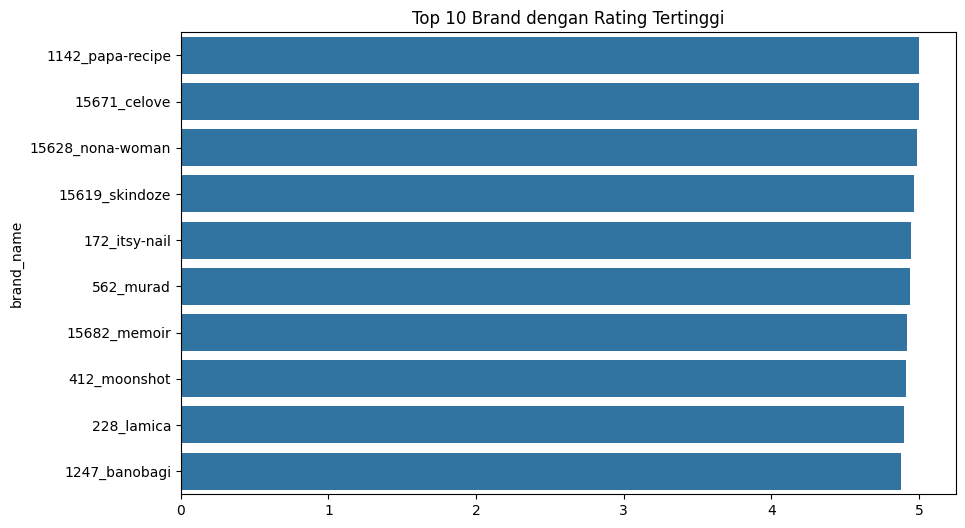

In [17]:
# Top 10 brand dengan rating tertinggi
top_brands = products.groupby('brand_name')['average_rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Brand dengan Rating Tertinggi")
plt.show()

Berdasarkan hasil visualisasi diatas, dapat diketahui bahwa daftar nama brand yang paling banyak mendapatkan rating tertinggi (>4.5) diantaranya meliputi papa-recipe, celove, nona-woman, skindoze, itsy-nail, murad, memoir, moonshot, lamica, dan banobagi.

## **Multivariate Analysis**

### **Korelasi antar Fitur Numerik dengan Menggunakan Heatmap Correlation**

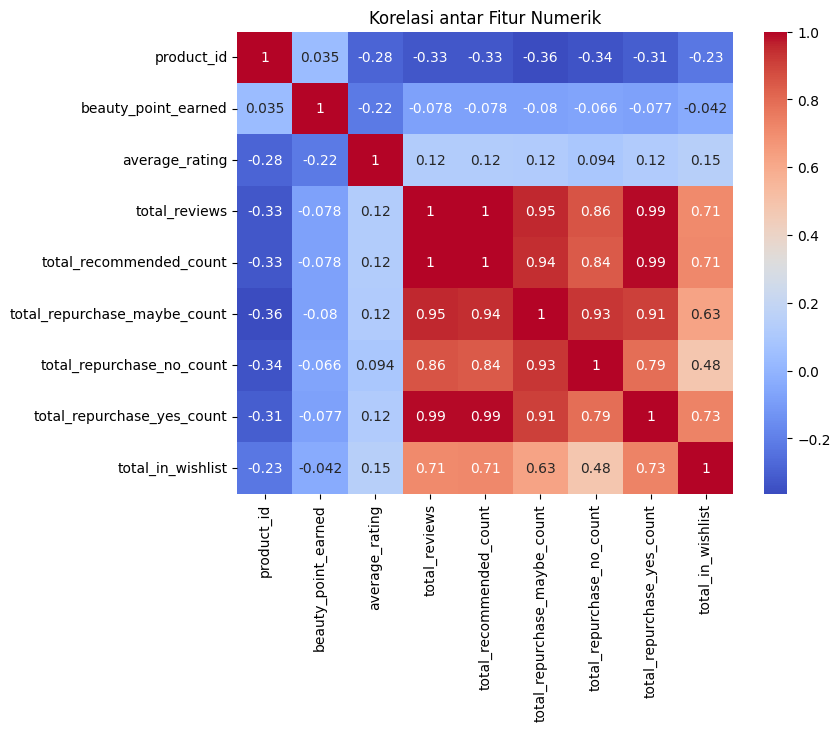

In [18]:
# Heatmap korelasi
numeric_columns = products.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = products[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Numerik")
plt.show()

1. **Korelasi Tinggi pada Fitur Tertentu:**
   * Terdapat korelasi yang sangat tinggi antara **total_recommended_count** dan **total_reviews88 (korelasi positif sangat kuat dengan nilai 1), ini menunjukkan bahwa produk yang paling banyak direkomendasikan cenderung memiliki jumlah review yang tinggi juga.
   * Terdapat korelasi yang sangat tinggi antara **total\_repurchase\_yes\_count** dan **total\_recommended\_count** (nilai korelasi mendekati 1). Hal ini menunjukkan bahwa produk yang sering direkomendasikan cenderung lebih banyak dibeli kembali oleh pengguna.
   * Korelasi tinggi juga terlihat antara **total\_reviews** dan variabel terkait repurchase behavior (**yes/maybe/no count**), yang menunjukkan bahwa jumlah ulasan dapat menjadi indikator penting untuk perilaku pembelian ulang.

2. **Korelasi Lemah pada Beberapa Fitur:**
   * Fitur seperti **beauty\_point\_earned** dan **average\_rating** memiliki korelasi lemah terhadap sebagian besar fitur lain. Sehingga untuk **beauty\_point\_earned** akan dilakukan drop kolom. Sedangkan, untuk fitur **average\_rating** tidak dilakukan drop kolom karena meskipun korelasinya lemah, kolom ini tetap penting untuk membangun sistem rekomendasi, terutama dalam pendekatan **Content-based Filtering**, yang memerlukan atribut produk untuk merepresentasikan karakteristiknya.

3. **Drop Kolom yang Tidak Berguna:**
   * Proses pembersihan data tetap dilakukan untuk memastikan efisiensi dan efektivitas dalam membangun sistem rekomendasi. Hanya fitur yang tidak berkontribusi terhadap pendekatan Content-based Filtering atau Collaborative Filtering yang akan dihapus, sementara fitur lainnya tetap dipertahankan karena relevansinya terhadap problem statement dan tujuan proyek.
   * Kolom-kolom yang tidak relevan dengan pendekatan **Content-based Filtering** (berbasis atribut produk) atau **Collaborative Filtering** (berbasis interaksi pengguna) akan dihapus, seperti **beauty\_point\_earned**, **url**, **price_by_combinations**, **active_date**, **categories**, **average_rating_by_types** dan **rating_types_str** dapat di-drop karena tidak berkontribusi langsung pada pembentukan rekomendasi.
   * Kolom yang tetap dipertahankan adalah yang berkaitan dengan atribut produk (**brand\_name**, **average\_rating**, dll.) atau interaksi pengguna (**total\_reviews**, **repurchase counts**, dll.).

# **5. Data Preparation**

 **Drop Kolom yang Tidak Berguna**

Berikut ini detail mengenai kolom-kolom yang akan di-drop karena tidak terlalu berpengaruh dalam membangun sistem rekomendasi berbasis Content-based (berdasarkan atribut produk) dan Collaborative Filtering (berdasarkan interaksi pengguna) yaitu:
- beauty_point_earned : kolom ini terkait dengan program loyalitas atau poin yang diperoleh pengguna, yang tidak secara langsung berkontribusi pada algoritma Content-based (berdasarkan atribut produk) atau Collaborative Filtering (berdasarkan interaksi pengguna).
- price_by_combinations: meskipun harga bisa menjadi faktor dalam keputusan pembelian, dalam konteks dasar Content-based dan Collaborative Filtering, detail harga spesifik atau range harga biasanya tidak menjadi fitur utama. Rekomendasi lebih berfokus pada kesamaan produk atau preferensi pengguna.
- url: URL produk tidak diperlukan untuk membangun model rekomendasi dan ini lebih relevan untuk display atau navigasi setelah rekomendasi dibuat.
- active_date: tanggal aktif produk mungkin berguna untuk analisis tren atau produk baru, tetapi tidak esensial untuk model rekomendasi dasar yang berfokus pada kesamaan atau interaksi.
- rating_types_str: karena sudah ada average_rating dan total_reviews, detail rating types dalam bentuk string tidak diperlukan.
Karena kolom tersebut tidak diperlukan dalam analisis pada tahap selanjutnya, maka kita perlu lakukan drop kolom.  

In [19]:
# Drop kolom yang tidak terlalu berpengaruh
products.drop(['beauty_point_earned'], inplace=True, axis=1)
products.drop(['price_by_combinations'], inplace=True, axis=1)
products.drop(['url'], inplace=True, axis=1)
products.drop(['active_date'], inplace=True, axis=1)
products.drop(['categories'], inplace=True, axis=1)
products.drop(['rating_types_str'], inplace=True, axis=1)
products.drop(['average_rating_by_types'], inplace=True, axis=1)
products

,brand_name,product_name,product_id,price_range,default_category,average_rating,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
0,796_3ce,MULTI EYE COLOR PALETTE,97802,Rp 555.000 - Rp 687.000,Eyeshadow,4.920000,5,5,0,0,5,717
1,796_3ce,VELVET LIP TINT,97810,Rp 264.000,Lip Cream,4.576190,42,42,10,2,30,682
2,796_3ce,LIP COLOR,97822,Rp 317.000,Lipstick,0.000000,0,0,0,0,0,173
3,796_3ce,MINI MULTI EYE COLOR PALETTE,97833,Rp 423.000,Eyeshadow,4.883333,6,12,1,0,11,257
4,796_3ce,FACE BLUSH,97801,Rp 300.000,Blush,4.858824,13,17,2,0,15,387
...,...,...,...,...,...,...,...,...,...,...,...,...
7631,273_yves-rocher,Ambre Noir Eau De Toilette,2158,Rp 659.000,Eau De Toilette,4.476190,7,6,1,2,4,355
7632,273_yves-rocher,Soin Stimulating Conditioner,64174,Rp 199.000,Conditioner,4.638889,9,7,1,2,6,122
7633,273_yves-rocher,Repair Hair Mask,36357,Rp 289.000,Hair Mask,4.750000,5,5,1,0,4,58
7634,273_yves-rocher,Hand Cream Olive Petitgrain,36404,Rp 109.000,Hand & Foot Cream,4.968750,8,8,2,0,6,117


## **Penanganan Missing Value**

In [20]:
# Memeriksa kembali apakah masih terdapat missing value
products.isnull().sum()

,0
brand_name,0
product_name,0
product_id,0
price_range,0
default_category,0
average_rating,0
total_reviews,0
total_recommended_count,0
total_repurchase_maybe_count,0
total_repurchase_no_count,0


Terlihat bahwa missing value sudah berhasil diatasi, ini karena kolom-kolom yang missing value menunjukkan bahwa kolom tersebut tidak terlalu berpengaruh untuk analisa pada tahap selanjutnya dan telah dilakukan dropping pada tahap sebelumnya.

## **Memisahkan Nilai Kolom Name Brand**

Selanjutnya, yaitu memisahkan nilai kolom nama brand. Dapat diketahui jika, kolom 'brand_name', tergabung dari dua values, yaitu nama brand, dan id brand, untuk itu dilakukan pemisahan dengan fungsi split()

In [21]:
# Memisahkan nilai kolom brand_name
products[['brand_name_id', 'brand_name']] = products['brand_name'].str.split('_', expand=True)
products

,brand_name,product_name,product_id,price_range,default_category,average_rating,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,brand_name_id
0,3ce,MULTI EYE COLOR PALETTE,97802,Rp 555.000 - Rp 687.000,Eyeshadow,4.920000,5,5,0,0,5,717,796
1,3ce,VELVET LIP TINT,97810,Rp 264.000,Lip Cream,4.576190,42,42,10,2,30,682,796
2,3ce,LIP COLOR,97822,Rp 317.000,Lipstick,0.000000,0,0,0,0,0,173,796
3,3ce,MINI MULTI EYE COLOR PALETTE,97833,Rp 423.000,Eyeshadow,4.883333,6,12,1,0,11,257,796
4,3ce,FACE BLUSH,97801,Rp 300.000,Blush,4.858824,13,17,2,0,15,387,796
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,yves-rocher,Ambre Noir Eau De Toilette,2158,Rp 659.000,Eau De Toilette,4.476190,7,6,1,2,4,355,273
7632,yves-rocher,Soin Stimulating Conditioner,64174,Rp 199.000,Conditioner,4.638889,9,7,1,2,6,122,273
7633,yves-rocher,Repair Hair Mask,36357,Rp 289.000,Hair Mask,4.750000,5,5,1,0,4,58,273
7634,yves-rocher,Hand Cream Olive Petitgrain,36404,Rp 109.000,Hand & Foot Cream,4.968750,8,8,2,0,6,117,273


In [22]:
# Pindahkan kolom baru ke posisi 0 dan 1
products.insert(0, 'brand_name', products.pop('brand_name'))
products.insert(0, 'brand_name_id', products.pop('brand_name_id'))
products

,brand_name_id,brand_name,product_name,product_id,price_range,default_category,average_rating,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
0,796,3ce,MULTI EYE COLOR PALETTE,97802,Rp 555.000 - Rp 687.000,Eyeshadow,4.920000,5,5,0,0,5,717
1,796,3ce,VELVET LIP TINT,97810,Rp 264.000,Lip Cream,4.576190,42,42,10,2,30,682
2,796,3ce,LIP COLOR,97822,Rp 317.000,Lipstick,0.000000,0,0,0,0,0,173
3,796,3ce,MINI MULTI EYE COLOR PALETTE,97833,Rp 423.000,Eyeshadow,4.883333,6,12,1,0,11,257
4,796,3ce,FACE BLUSH,97801,Rp 300.000,Blush,4.858824,13,17,2,0,15,387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,273,yves-rocher,Ambre Noir Eau De Toilette,2158,Rp 659.000,Eau De Toilette,4.476190,7,6,1,2,4,355
7632,273,yves-rocher,Soin Stimulating Conditioner,64174,Rp 199.000,Conditioner,4.638889,9,7,1,2,6,122
7633,273,yves-rocher,Repair Hair Mask,36357,Rp 289.000,Hair Mask,4.750000,5,5,1,0,4,58
7634,273,yves-rocher,Hand Cream Olive Petitgrain,36404,Rp 109.000,Hand & Foot Cream,4.968750,8,8,2,0,6,117


Hasilnya menunjukkan nilai berhasil dipisah, dan kolom 'brand_name_id' telah berhasil dibuat.

## **Preparation Content-Based Filtering**

### **Konversi Data Series dalam Bentuk List**

Selanjutnya yaitu mengonversi data series menjadi list, yang akan memudahkan dalam membuat dataframe baru atau mengolah data lebih lanjut. Dalam hal ini, akan mengonversi kolom-kolom seperti brand_name, product_name, dan default_category ke dalam list.

In [23]:
# Mengonversi data series ‘brand_name’ menjadi dalam bentuk list
brand_name = products['brand_name'].tolist()

# Mengonversi data series ‘product_name’ menjadi dalam bentuk list
product_name = products['product_name'].tolist()

# Mengonversi data series ‘default_category’ menjadi dalam bentuk list
default_category = products['default_category'].tolist()

print(len(brand_name))
print(len(product_name))
print(len(default_category))

7636
7636
7636


## **Membuat Dataframe baru**

Tahap berikutnya yaitu membuat dictionary untuk menentukan pasangan key-value pada data brand_name, product_name dan default_category yang telah disiapkan pada tahap sebelumnya. Dimana tahapan ini untuk menggabungkan data brand_name, product_name dan default_category menjadi satu DataFrame baru yang siap digunakan untuk model sistem rekomendasi berbasis konten.

In [24]:
# Membuat dictionary untuk data ‘brand_name’, ‘product_name’, dan ‘default_category’
product_data = pd.DataFrame({
    'brand_name': brand_name,
    'product_name': product_name,
    'default_category': default_category
})

product_data.head()

,brand_name,product_name,default_category
0,3ce,MULTI EYE COLOR PALETTE,Eyeshadow
1,3ce,VELVET LIP TINT,Lip Cream
2,3ce,LIP COLOR,Lipstick
3,3ce,MINI MULTI EYE COLOR PALETTE,Eyeshadow
4,3ce,FACE BLUSH,Blush


Selanjutnya, dilakukan penghapusan duplikasi pada DataFrame product_data dengan fokus pada kolom 'brand_name'.

In [25]:
# Menampilkan duplikat data
product_duplicate = product_data.duplicated().sum()
print(f"Jumlah baris duplikat: {product_duplicate}")

Jumlah baris duplikat: 34


In [26]:
product_data = product_data.drop_duplicates(subset=['brand_name'])

In [27]:
# Memeriksa kembali duplikasi data
product_duplicate = product_data.duplicated().sum()
print(f"Jumlah baris duplikat: {product_duplicate}")

Jumlah baris duplikat: 0


Terlihat bahwa data duplikasi telah berhasil ditangani, maka bisa dilanjutkan untuk tahap selanjutnya.

## **TF-IDF Vectorizer**

Pada langkah ini, dimana akan menggunakan TF-IDF Vectorizer untuk mendapatkan representasi fitur penting dari setiap kategori produk. Dimana disini akan fokus pada kolom default_category.

In [28]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data 'default_category'
tf.fit(product_data['default_category'])

# Menampilkan fitur nama dari hasil perhitungan tf-idf
tf.get_feature_names_out()

array(['acne', 'ampoule', 'and', 'applicators', 'arts', 'balm', 'bath',
       'beauty', 'blush', 'body', 'bronzer', 'brush', 'brushes', 'butter',
       'cap', 'care', 'cleanser', 'cleansing', 'clipper', 'color',
       'combs', 'concealer', 'conditioner', 'contour', 'cotton', 'cream',
       'curler', 'curling', 'cushion', 'de', 'deodorant', 'dry', 'eau',
       'essence', 'exfoliants', 'exfoliator', 'eye', 'eyebrows',
       'eyelash', 'eyelashes', 'eyeliner', 'eyeshadow', 'face', 'facial',
       'false', 'foot', 'foundation', 'gel', 'gloss', 'hair', 'hand',
       'iron', 'lip', 'lipstick', 'lotion', 'makeup', 'mascara', 'mask',
       'micellar', 'mist', 'mouthwash', 'nail', 'off', 'oil', 'pad',
       'pads', 'palette', 'palettes', 'parfum', 'patch', 'peel', 'pimple',
       'polish', 'powder', 'pressed', 'removal', 'remover', 'room',
       'sanitizer', 'scrub', 'sealing', 'serum', 'set', 'shampoo',
       'shaver', 'sheet', 'shower', 'skin', 'sleeping', 'sponge', 'spray',
    

Setelah menghitung IDF, selanjutnya dengan melakukan transformasi untuk menghasilkan matriks TF-IDF yang menggambarkan hubungan antara setiap kategori produk.

In [29]:
# Melakukan transformasi data 'default_category' menjadi matriks tf-idf
tfidf_matrix = tf.fit_transform(product_data['default_category'])

# Melihat ukuran matriks tf-idf
tfidf_matrix.shape

(321, 103)

Matriks berukuran (7636, 210). Nilai 7636 merupakan ukuran data dan 210 merupakan matrik kategori produk atau banyaknya tipe dari kategori produk.

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, gunakan fungsi todense().

In [30]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.7366738,
         0.       ]])

In [31]:
# matriks tf-idf untuk nama produk dan kategori produk.
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=product_data['product_name'].values
).sample(20, axis=1).sample(20, axis=0)

,hair,tint,cushion,lip,eau,mist,foot,false,mouthwash,eyeliner,curler,sanitizer,arts,dry,makeup,mask,eyeshadow,eye,mascara,color
Cicamide Facial Cleanser,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Slick Cover Jelly Tint,0.0,0.774126,0.0,0.633031,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Bioderma Sensibio H2O - Soothing Micellar Water,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Implora Jelly Tint,0.0,0.774126,0.0,0.633031,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
AM to PM Colorfast Hypertint,0.0,0.774126,0.0,0.633031,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Eyelash Curler Eye Make Up Tool Pink,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.719695,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Orange C+ Bright Pore-Care Korean Light Serum,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Greentea Water,0.0,0.000000,0.0,0.000000,0.000000,0.860205,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Loui - Extrait De Parfum,0.0,0.000000,0.0,0.000000,0.573902,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Rich-Nourishment Sheet Mask,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.643921,0.0,0.0,0.0,0.0


Output sampel matriks tf-idf di atas menunjukkan Exfoliating + Hydrating termasuk dalam kategori skin, hal ini terlihat dari nilai matriks 0.613476 pada kategori skin. Begitu juga dengan One by KOSE The Wrinkless S dan Licorice Toner & Eye Cream Set, termasuk dalam kategori skin dengan nilai yang sama-sama menunjukkan 0.613476.

## **Persiapan Collaborative Filtering**

In [32]:
# Membaca dataset
df = products
df

,brand_name_id,brand_name,product_name,product_id,price_range,default_category,average_rating,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
0,796,3ce,MULTI EYE COLOR PALETTE,97802,Rp 555.000 - Rp 687.000,Eyeshadow,4.920000,5,5,0,0,5,717
1,796,3ce,VELVET LIP TINT,97810,Rp 264.000,Lip Cream,4.576190,42,42,10,2,30,682
2,796,3ce,LIP COLOR,97822,Rp 317.000,Lipstick,0.000000,0,0,0,0,0,173
3,796,3ce,MINI MULTI EYE COLOR PALETTE,97833,Rp 423.000,Eyeshadow,4.883333,6,12,1,0,11,257
4,796,3ce,FACE BLUSH,97801,Rp 300.000,Blush,4.858824,13,17,2,0,15,387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,273,yves-rocher,Ambre Noir Eau De Toilette,2158,Rp 659.000,Eau De Toilette,4.476190,7,6,1,2,4,355
7632,273,yves-rocher,Soin Stimulating Conditioner,64174,Rp 199.000,Conditioner,4.638889,9,7,1,2,6,122
7633,273,yves-rocher,Repair Hair Mask,36357,Rp 289.000,Hair Mask,4.750000,5,5,1,0,4,58
7634,273,yves-rocher,Hand Cream Olive Petitgrain,36404,Rp 109.000,Hand & Foot Cream,4.968750,8,8,2,0,6,117


In [33]:
# Mengubah brand_name_id menjadi list tanpa nilai yang sama
brand_name_ids = df['brand_name_id'].unique().tolist()
print('list brand_name_id: ', brand_name_ids)

# Melakukan encoding brand_name_id
brand_to_brand_encoded = {x: i for i, x in enumerate(brand_name_ids)}
print('encoded brand_name_id : ', brand_to_brand_encoded)

# Melakukan proses encoding angka ke ke userID
brand_encoded_to_brand = {i: x for i, x in enumerate(brand_name_ids)}
print('encoded angka ke brand_name_id: ', brand_encoded_to_brand)

list brand_name_id:  ['796', '751', '730', '15654', '584', '15703', '15542', '1350', '15700', '2019', '15689', '814', '2086', '281', '1196', '504', '15230', '475', '1371', '202', '1247', '1284', '1322', '515', '2271', '15526', '15662', '109', '575', '731', '15349', '1161', '192', '252', '176', '286', '15664', '2188', '154', '15576', '1117', '237', '15512', '1356', '1333', '1138', '15579', '15690', '15672', '1292', '743', '15200', '15059', '833', '1124', '15485', '15702', '1020', '15671', '238', '161', '294', '1067', '318', '15697', '1269', '558', '15378', '1482', '329', '15599', '1043', '1985', '15499', '277', '15015', '15026', '1041', '15620', '278', '763', '808', '15434', '118', '1895', '1946', '407', '15626', '324', '1689', '182', '321', '275', '1368', '569', '15575', '740', '15577', '15569', '15301', '1349', '15698', '15673', '342', '638', '15555', '778', '307', '1131', '1386', '15684', '15659', '15470', '15663', '297', '15493', '15528', '14894', '15668', '288', '920', '15289', '98

In [34]:
# Mengubah product_id menjadi list tanpa nilai yang sama
product_ids = df['product_id'].unique().tolist()
print('list product_id: ', product_ids)

# Melakukan proses encoding product_id
product_to_product_encoded = {x: i for i, x in enumerate(product_ids)}
print('encoded product_id : ', product_to_product_encoded)

# Melakukan proses encoding angka ke product_id
product_encoded_to_product = {i: x for i, x in enumerate(product_ids)}
print('encoded angka ke I: ', product_encoded_to_product)

list product_id:  [97802, 97810, 97822, 97833, 97801, 97817, 97818, 98428, 98369, 98368, 98363, 107427, 98429, 98409, 97803, 98433, 98312, 98430, 98431, 102642, 107426, 98435, 107425, 98434, 98432, 98370, 91887, 91207, 91209, 91204, 91206, 91895, 91194, 98624, 91886, 91885, 106156, 91195, 91201, 91203, 98614, 98609, 98611, 91889, 98610, 91199, 98599, 98608, 91893, 21291, 90792, 90795, 90794, 82363, 63246, 99997, 105752, 105751, 105750, 102279, 102277, 102276, 76061, 82362, 90791, 90793, 105753, 102278, 85742, 104991, 105056, 104993, 105055, 104992, 104998, 105054, 104994, 104990, 105007, 105000, 104999, 104997, 104996, 104995, 105010, 105009, 105006, 99707, 102712, 75162, 100773, 102710, 104076, 104048, 104050, 87216, 104614, 104085, 94533, 104049, 34585, 104053, 104080, 104068, 104615, 86888, 86887, 92097, 104079, 104066, 104065, 104052, 104070, 104062, 104083, 104061, 72439, 72441, 74540, 82692, 91000, 104087, 104069, 104063, 104056, 104058, 104060, 85150, 86886, 104086, 104072, 1040

### **Memetakan brand_name_id dan product_id ke Dataframe yang Berkaitan**

Selanjutnya, dilakukan pemetaan 'brand_name_id' dan 'product_id' ke kolom baru 'brand' dan 'product' dalam DataFrame. Kolom 'brand' dibuat dengan memetakan setiap 'brand_name_id' asli ke representasi integer yang telah di-encode menggunakan kamus brand_to_brand_encoded, sementara kolom 'product' dihasilkan dengan memetakan 'product_id' asli ke integer yang di-encode menggunakan kamus product_to_product_encoded

In [35]:
# Mapping brand_name_id ke dataframe user
df['brand'] = df['brand_name_id'].map(brand_to_brand_encoded)

# Mapping product_id ke dataframe product
df['product'] = df['product_id'].map(product_to_product_encoded)

### **Mengecek Jumlah Brand dan Jumlah Product dan Mengubah Nilai Rating menjadi float**

Selanjutnya, jumlah brand (num_brands) dihitung dari ID Brand yang sudah di-encode, dan jumlah product (num_products) dihitung dari ID Product yang sudah di-encode.

Kemudian, dilakukan pemeriksaan dan penentuan nilai minimum (min_rating) serta nilai maksimum (max_rating) dari kolom average_rating. Karena kolom tersebut sudah berbentuk tipe data float, maka langsung saja dengan mengambil nilai minimum dan maksimum dari seluruh rating yang ada.

In [36]:
# Mendapatkan jumlah brand
num_brands = len(brand_to_brand_encoded)
print(num_brands)

# Mendapatkan jumlah product
num_products = len(product_encoded_to_product)
print(num_products)

# Nilai minimum rating
min_rating = min(df['average_rating'])

# Nilai maksimal rating
max_rating = max(df['average_rating'])

print('Number of Brand: {}, Number of Product: {}, Min Rating: {}, Max Rating: {}'.format(
    num_brands, num_products, min_rating, max_rating
))

319
7636
Number of Brand: 319, Number of Product: 7636, Min Rating: 0.0, Max Rating: 5.0


### **Membagi Data untuk Training dan Validasi**

Sebelum membagi data menjadi training dan validasi, seluruh data terlebih dahulu diacak agar distribusi data lebih merata dan tidak bias.

In [37]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,brand_name_id,brand_name,product_name,product_id,price_range,default_category,average_rating,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,brand,product
683,15526,beauty-of-majesty,Eight Tea Cleansing Water,89845,Rp 269.000,Makeup Remover,5.000000,3,4,0,0,4,86,25,683
4457,847,mirael,Moisturizing Honey Sugar Wax Kit,92538,Rp 95.000,Hair Removal Care,4.647436,39,37,9,1,29,525,192,4457
2457,1349,feat-for-skin,Skintuition Hydrating Gel Crème,92662,Rp 129.500,Face Gel,4.350000,10,8,1,3,6,232,100,2457
2598,307,garnier,Hydrabomb Serum Mask,19764,Rp 23.500,Sheet Mask,4.507502,5465,5236,891,339,4235,699,107,2598
7036,15608,the-originote,B5 Acne Serum,101543,Rp 38.000,Face Serum,4.732639,72,70,16,2,54,461,292,7036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,1142,papa-recipe,Bombee Honey Mask Pack,106251,Rp 42.000,Sheet Mask,5.000000,1,1,0,0,1,42,222,5226
5390,1346,precious-skin,Alpha Arbutin Collagen Body Serum UV Formula P...,95707,Rp 130.000,Face Serum,4.078947,19,18,6,1,12,322,230,5390
860,252,bio-essence,Twinpack Bioessence BioWater Energizing Water ...,92067,Rp 555.000,Face Mist,0.000000,0,0,0,0,0,2,33,860
7603,14878,you-beauty,YOU Cloud Touch Fixing Tint Special Pack,100820,Rp 249.000,Lip Tint,4.900000,2,2,0,0,2,18,316,7603


Kemudian, fitur input (brand dan product) dan target (rating) dipisahkan. Rating dinormalisasi ke rentang 0-1 agar lebih stabil saat dipelajari model. Setelah itu, data dibagi menjadi 80% data pelatihan dan 20% data validasi untuk memastikan evaluasi model dilakukan secara adil terhadap data yang belum pernah dilihat sebelumnya.

In [38]:
# Membuat variabel x untuk mencocokkan data brand dan product menjadi satu value
x = df[['brand', 'product']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['average_rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  25  683]
 [ 192 4457]
 [ 100 2457]
 ...
 [  33  860]
 [ 316 7603]
 [ 308 7270]] [1.         0.92948718 0.87       ... 0.         0.98       0.91336207]


Data telah siap untuk dimasukkan ke dalam model.

# **Model Development**

## **Model Development dengan Content-Based Filtering**

Selanjutnya, menghitung derajat kesamaan (similarity degree) antara product yang satu dengan product lainnya dengan teknik cosine similarity. Di sini, akann menggunakan fungsi cosine_similarity dari library sklearn.

In [39]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [40]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama product
cosine_sim_df = pd.DataFrame(cosine_sim, index=product_data['product_name'], columns=product_data['product_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

# Menampilkan hasil dari similarity matrix
cosine_sim_df.head(10)

Shape: (321, 321)


product_name,MULTI EYE COLOR PALETTE,Heartleaf Essence Calming Pump,Licorice pH Balancing Cleansing Toner,Noni Glow Conentrate,Nudie Blendies - Makeup Sponge,Glazed Lip Tint,01 Powder Room Eau De Parfum,"Shake Lip Pigment (SLP) - Matte Liquid Lipstick, Serum-Infused",DEW POWER VEGAN CUSHION,New Brightening Uv Sunscreen Gel,...,Secretly Sexy Eau De Parfum,Vitamin C Serum,Colorfit Velvet Matte Lip Mousse,Brightening Face Toner,Ready Set Smooth! Hair Perfecting Oil,Candy Pop Glow Melting Balm,All Night Pads,YOU Cloud Touch Fixing Lip Tint,Youvit Beauty+ 30 days,Shower Gel
product_name,,,,,,,,,,,,,,,,,,,,,
MULTI EYE COLOR PALETTE,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
Heartleaf Essence Calming Pump,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
Licorice pH Balancing Cleansing Toner,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
Noni Glow Conentrate,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.371779,0.000000,0.0,0.622318,0.000000,0.0,0.000000,0.0,0.0
Nudie Blendies - Makeup Sponge,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
Glazed Lip Tint,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.440314,0.0,0.0,...,0.0,0.000000,0.440314,0.0,0.000000,0.386133,0.0,1.000000,0.0,0.0
01 Powder Room Eau De Parfum,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,...,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
"Shake Lip Pigment (SLP) - Matte Liquid Lipstick, Serum-Infused",0.0,0.0,0.0,0.0,0.0,0.440314,0.0,1.000000,0.0,0.0,...,0.0,0.000000,1.000000,0.0,0.000000,0.424277,0.0,0.440314,0.0,0.0
DEW POWER VEGAN CUSHION,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


Cosine similarity digunakan untuk menghitung kemiripan antar nama produk, menghasilkan matriks berukuran (7636, 7636). Matriks ini merepresentasikan tingkat kesamaan antar 7636 produk. Karena ukurannya besar, hanya ditampilkan sebanyak 10 sampel data saja, yaitu 10 produk secara vertikal dan 10 secara horizontal. Data ini digunakan untuk merekomendasikan produk yang mirip dengan yang pernah dibeli oleh pengguna.

Contoh: angka 1 pada CLOUD LIP TINT dan VELVET LIP TINT menunjukkan dua produk ini memiliki kesamaan kategori produk.

In [41]:
def products_recommendations(nama_produk, similarity_data=cosine_sim_df, items=product_data[['product_name',
                                                                                                     'brand_name',
                                                                                                     'default_category']], k=10):
    """
    Rekomendasi Produk berdasarkan kemiripan dataframe

    Parameter:
    ---
    product_name : tipe data string (str)
                   nama produk (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan produk sebagai indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung nama produk dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---

    Pada index ini, akan mengambil k produk dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """

    index = similarity_data.loc[:,nama_produk].to_numpy().argpartition(
        range(-1, -k-1, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(nama_produk, errors='ignore')
    recommendations = pd.DataFrame(closest, columns=['product_name']).merge(items, on='product_name')

    return recommendations.head(k)

Sistem rekomendasi akan memberikan produk yang memiliki similarity terhadap produk yang diinput oleh pengguna berdasarkan kesamaan kategori dan rating yang paling tinggi dari produk-produk rekomendasi, hasil similarity tiap produk sudah didapat dari perhitungan sebelumnya.

Dibuat fungsi dengan nama products_recommendations, dengan nama_produk sebagai parameter pencarian, hasil kesamaan yang diambil dari cosine_sim_df, isi dari dataframe yang ingin ditampilkan dan k (jumlah rekomendasi yang diinginkan) sebanyak 10. Lalu membuat index untuk mengambil urutan indek produk yang paling mirip, dengan similarity_data, dengan **fungsi argpartition** untuk mengurutkan indeks array berdasarkan **skor kemiripan dari yang tertinggi ke terendah** (berdasarkan parameter range(-1, -k-1, -1)).

Daftar produk disimpan dalam **closest**, dengan mengambil skor kemiripan tertinggi, lalu menghapus nama produk itu sendiri dari daftar rekomendasi. Terakhir, dibuat variabel recommendation, untuk membuat dataframe dari data closest, column, dan items untuk digabung menjadi satu, diberikan tambahan untuk mengurutkan **produk rekomendasi dari rating yang paling tinggi dan nilai k dikembalikan**.

In [42]:
# Menampilkan list nama produk sebagian
product_data['product_name'].unique()

array(['MULTI EYE COLOR PALETTE', 'Heartleaf Essence Calming Pump',
       'Licorice pH Balancing Cleansing Toner', 'Noni Glow Conentrate',
       'Nudie Blendies - Makeup Sponge', 'Glazed Lip Tint',
       '01 Powder Room Eau De Parfum',
       'Shake Lip Pigment (SLP) - Matte Liquid Lipstick, Serum-Infused',
       'DEW POWER VEGAN CUSHION', 'New Brightening Uv Sunscreen Gel',
       'Heartleaf 77% Soothing Toner', 'Argan Shampoo',
       'Pack of 6 - 7Days Mask Green Tea+S', 'Classiques',
       'Daily Moisturizing Lotion', 'Miraculous Refining Toner',
       'Spot the Difference Blemish Treatment',
       'Hydramax-C Sunscreen Serum',
       'Recharge Honey Lemon Tube | 14 Sachet',
       'Sport Ultra SPF50+ Sunscreen Lotion',
       'Vita Genic Jelly Mask Cica', 'Cherry Makes Cheerful Lip Velvet',
       'Dreamy Glow Postbiotic Gel Mask',
       'Tropical Exotic Coconut Dry Shampoo',
       'Glow Serum : Propolis + Niacinamide', 'Wonderproof Pen Eye Liner',
       'Lovely Lavender

In [43]:
# Menampilkan rekomendasi produk berdasarkan kemiripan
products_recommendations("Bakuchiol Revitalizing Serum")

,product_name,brand_name,default_category
0,Intensive Bright & Glow Serum Improved Formula,nutrishe,Face Serum
1,Calming Moisture Serum,pyunkang-yul,Face Serum
2,Oh! So Bright Serum,feat-for-skin,Face Serum
3,Waterymelon Deep Hydration Emulsion,harlette,Face Serum
4,Glow Serum : Propolis + Niacinamide,beauty-of-joseon,Face Serum
5,Super Matcha Pore Tightening Serum,some-by-mi,Face Serum
6,Vita -C Glycolic Brightening Serum,murad,Face Serum
7,10% Niacinamide Serum,skintific,Face Serum
8,Backhousia Day Infused Serum,rivya,Face Serum
9,Orange C+ Bright Pore-Care Korean Light Serum,rojukiss,Face Serum


In [44]:
# Menampilkan rekomendasi produk berdasarkan kemiripan kategori produk
products_recommendations("Signature Facial Moisturizer")

,product_name,brand_name,default_category
0,Vita Duo Cream Joan Day Joan Night,neogen-dermalogy,Face Cream & Lotion
1,KEANA Baking Soda Nose Cream Pack,keana-nadeshiko,Face Cream & Lotion
2,Ceramide Hydra Lock Moisturizer,bhumi,Face Cream & Lotion
3,Lait Creme Concentre,embryolisse,Face Cream & Lotion
4,Sekkisei Essential Souffle,kose,Face Cream & Lotion
5,Skin Conditioner,hatomugi,Face Cream & Lotion
6,Kind Cream Moisturizer,skin-game,Face Cream & Lotion
7,Peptide Moist jar,glowlabs,Face Cream & Lotion
8,Dive-In Low Molecular Hyaluronic Acid Cream,torriden,Face Cream & Lotion
9,Moisturizing Cream,cetaphil,Face Cream & Lotion


Berdasarkan output diatas, sistem berhasil merekomendasikan 10 produk teratas dengan kategori produk (default_category) yaitu 'Face Cream & Lotion' dan memiliki nama produk yang mirip (masih dalam satu kategori yang sama dengan face cream & lotion).

## **Model Development dengan Collaborative Filtering**

### **Membuat Kelas RecommenderNet**

Pada proses pelatihan, model menghitung tingkat kecocokan antara brand dan produk dengan memanfaatkan embedding. Data brand dan nama produk pertama-tama diubah menjadi embedding, lalu dilakukan operasi dot product antara kedua embedding tersebut. Selain itu, bias individual untuk brand dan produk turut ditambahkan. Hasil kecocokan ini kemudian diubah menjadi nilai antara 0 sampai 1 menggunakan fungsi aktivasi sigmoid.

Model ini dibangun sebagai sebuah kelas bernama **ProductRecommenderNet** yang merupakan turunan dari kelas Model di Keras.

In [45]:
import tensorflow as tf
class ProductRecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size, dropout_rate=0.2, **kwargs):
        super(ProductRecommenderNet, self).__init__(**kwargs)
        self.num_brands = num_brands
        self.num_products = num_products
        self.embedding_size = embedding_size
        self.dropout_rate = dropout_rate

        # Brand embeddings
        self.brand_embedding = layers.Embedding(
            num_brands,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.brand_bias = layers.Embedding(num_brands, 1)  # Brand bias

        # Product embeddings
        self.product_embedding = layers.Embedding(
            num_products,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.product_bias = layers.Embedding(num_products, 1)  # product bias
        self.dropout = layers.Dropout(rate=dropout_rate)

    def call(self, inputs):
        brand_vector = self.brand_embedding(inputs[:, 0])  # Brand embedding
        brand_vector = self.dropout(brand_vector)
        brand_bias = self.brand_bias(inputs[:, 0])  # User bias
        product_vector = self.product_embedding(inputs[:, 1])  # product embedding
        product_vector = self.dropout(product_vector)
        product_bias = self.product_bias(inputs[:, 1])  # product bias

        # Dot antara vektor brand dan produk
        dot_brand_product = tf.tensordot(brand_vector, product_vector, 2)

        # Menambahkan bias pengguna dan bias buku
        x = dot_brand_product + brand_bias + product_bias

        return tf.nn.sigmoid(x)  # Aktivasi sigmoid untuk prediksi rating

Selanjutnya, lakukan proses compile terhadap model

In [46]:
# Iniisialisasi Model
model = ProductRecommenderNet(num_brands, num_products, 50)

# Compile Model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini memanfaatkan Binary Crossentropy sebagai fungsi loss, menggunakan optimizer Adam (Adaptive Moment Estimation), dan mengukur performa dengan metrik root mean squared error (RMSE).

Langkah selanjutnya yaitu melakukan pelatihan (training).

In [47]:
history = model.fit(
    x=x_train,  # Input data (brand_name_id, product_id)
    y=y_train,  # Target data (ratings)
    batch_size=64,
    epochs=50,
    validation_data=(x_val, y_val)  # Validation data
)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6915 - root_mean_squared_error: 0.4483 - val_loss: 0.7016 - val_root_mean_squared_error: 0.4532
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6653 - root_mean_squared_error: 0.4337 - val_loss: 0.7001 - val_root_mean_squared_error: 0.4524
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6403 - root_mean_squared_error: 0.4186 - val_loss: 0.6988 - val_root_mean_squared_error: 0.4517
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6212 - root_mean_squared_error: 0.4078 - val_loss: 0.6974 - val_root_mean_squared_error: 0.4509
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6085 - root_mean_squared_error: 0.3990 - val_loss: 0.6962 - val_root_mean_squared_error: 0.4502
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6015 - root_mean_squared_error: 0.3958 - val_loss: 0.6950 - val_root_mean_squared_error: 0.4496
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.60

**Mendapatkan Rekomendasi**

Untuk **Collaborative Filtering**, pendekatan ini umumnya hanya berfokus pada pola interaksi antara pengguna dan produk. Setelah training model, proses rekomendasi dimulai dengan memilih satu produk secara acak dari dataset. Dari produk ini, diidentifikasi produk mana yang sudah diberi rating dan produk yang belum pernah dinilai.

Produk-produk yang belum dinilai di-encode sesuai dengan format embedding, kemudian dibuat array input gabungan antara brand yang sudah di-encode dan produk-produk yang belum dinilai.

Untuk mendapatkan rekomendasi produk, pertama kita ambil sampel pengguna secara acak dan definisikan variabel products_not_interacted, yaitu daftar produk yang belum pernah diinteraksikan oleh pengguna tersebut. Mengapa kita perlu menentukan products_not_interacted? Hal ini karena produk dalam daftar inilah yang akan menjadi kandidat untuk direkomendasikan.

Sebelumnya, pengguna telah memberikan interaksi berupa rating, wishlist, atau pembelian ulang pada beberapa produk yang pernah mereka gunakan. Data interaksi ini digunakan untuk membangun sistem rekomendasi produk, baik menggunakan pendekatan Collaborative Filtering maupun Content-based Filtering.

Produk yang akan direkomendasikan tentunya adalah produk yang belum pernah diinteraksikan oleh pengguna tersebut. Oleh karena itu, kita perlu membuat variabel products_not_interacted sebagai daftar produk untuk direkomendasikan kepada pengguna.

In [48]:
df

,brand_name_id,brand_name,product_name,product_id,price_range,default_category,average_rating,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,brand,product
683,15526,beauty-of-majesty,Eight Tea Cleansing Water,89845,Rp 269.000,Makeup Remover,5.000000,3,4,0,0,4,86,25,683
4457,847,mirael,Moisturizing Honey Sugar Wax Kit,92538,Rp 95.000,Hair Removal Care,4.647436,39,37,9,1,29,525,192,4457
2457,1349,feat-for-skin,Skintuition Hydrating Gel Crème,92662,Rp 129.500,Face Gel,4.350000,10,8,1,3,6,232,100,2457
2598,307,garnier,Hydrabomb Serum Mask,19764,Rp 23.500,Sheet Mask,4.507502,5465,5236,891,339,4235,699,107,2598
7036,15608,the-originote,B5 Acne Serum,101543,Rp 38.000,Face Serum,4.732639,72,70,16,2,54,461,292,7036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,1142,papa-recipe,Bombee Honey Mask Pack,106251,Rp 42.000,Sheet Mask,5.000000,1,1,0,0,1,42,222,5226
5390,1346,precious-skin,Alpha Arbutin Collagen Body Serum UV Formula P...,95707,Rp 130.000,Face Serum,4.078947,19,18,6,1,12,322,230,5390
860,252,bio-essence,Twinpack Bioessence BioWater Energizing Water ...,92067,Rp 555.000,Face Mist,0.000000,0,0,0,0,0,2,33,860
7603,14878,you-beauty,YOU Cloud Touch Fixing Tint Special Pack,100820,Rp 249.000,Lip Tint,4.900000,2,2,0,0,2,18,316,7603


In [49]:
# Memuat dataset produk
products

# Mengatur seed untuk memastikan hasil acak yang konsisten
np.random.seed(42)

# Simulasi dataset interaksi
# Dataset ini mensimulasikan interaksi pengguna dengan produk
interactions = pd.DataFrame({
    'user_id': np.random.randint(1, 7637, size=500),  # untuk membuat data interaksi simulasi karena data asli pengguna (user_id) tidak tersedia dimana total dataset ada 7637
    'product_id': np.random.choice(products['product_id'], size=500),  # Produk yang diinteraksikan
    'interaction': np.random.choice([1, 0], size=500, p=[0.7, 0.3])  # 1 = Interaksi, 0 = Tidak ada interaksi
})

# Mengambil sampel user secara acak
user_id = interactions['user_id'].sample(1).iloc[0]
products_interacted_by_user = interactions[interactions['user_id'] == user_id]

# Menentukan produk yang belum diinteraksikan oleh user
products_not_interacted = products[~products['product_id'].isin(products_interacted_by_user['product_id'].values)]['product_id']

# Simulasi encoding untuk produk
product_to_product_encoded = {product: idx for idx, product in enumerate(products['product_id'])}
product_encoded_to_product = {idx: product for product, idx in product_to_product_encoded.items()}

# Simulasi encoding untuk user
user_to_user_encoded = {user: idx for idx, user in enumerate(interactions['user_id'].unique())}
user_encoded_to_user = {idx: user for user, idx in user_to_user_encoded.items()}

# Encode produk yang belum diinteraksikan
products_not_interacted_encoded = [[product_to_product_encoded.get(x)] for x in products_not_interacted]

# Encode user_id
user_encoder = user_to_user_encoded.get(user_id)

# Membuat array input untuk prediksi
user_product_array = np.hstack(
    ([[user_encoder]] * len(products_not_interacted_encoded), products_not_interacted_encoded)
)

# Output
print(f"Sampel User ID: {user_id}")
print("Produk yang belum diinteraksikan (encoded):", products_not_interacted_encoded[:20])  # Menampilkan sebagian


Sampel User ID: 302
Produk yang belum diinteraksikan (encoded): [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19]]


In [50]:
# Simulasi model prediksi
# Dummy model prediksi, menggantikan "model.predict"
predicted_interactions = np.random.uniform(0, 1, len(user_product_array))

# Mengambil 10 produk dengan prediksi interaksi tertinggi
top_interactions_indices = predicted_interactions.argsort()[-10:][::-1]
recommended_product_ids = [
    product_encoded_to_product.get(products_not_interacted_encoded[x][0]) for x in top_interactions_indices
]

# Menampilkan rekomendasi untuk pengguna
print('Showing recommendations for user:', user_id)
print('===' * 9)
print('Products with high interactions from user:')
print('----' * 8)

# Menampilkan 5 produk yang telah diinteraksikan oleh pengguna
top_products_user = (
    products_interacted_by_user.sort_values(
        by='interaction',
        ascending=False
    )
    .head(5)
    ['product_id'].values
)

# Mengambil data produk yang sudah diinteraksikan oleh pengguna
product_rows = products[products['product_id'].isin(top_products_user)]
for index, row in product_rows.iterrows():
    print(row['product_name'], ':', row['average_rating'])

print('----' * 8)
print('Top 10 product recommendations:')
print('----' * 8)

# Menampilkan 10 produk rekomendasi teratas berdasarkan prediksi
recommended_products = products[products['product_id'].isin(recommended_product_ids)]

# Menyaring produk dengan average_rating > 0
filtered_recommended_products = recommended_products[recommended_products['average_rating'] > 0]

for index, row in filtered_recommended_products.iterrows():
    print(row['product_name'], ':', row['average_rating'])

Showing recommendations for user: 302
Products with high interactions from user:
--------------------------------
Renew You Toner Essence : 4.331284153005464
--------------------------------
Top 10 product recommendations:
--------------------------------
Body Wash PATCHOULI : 5.0
Song of The Youth : 4.661403508771929
Rose Elastic Cream (Curl Cream) : 4.5588235294117645
Hand & Nature White Musk Hand Cream : 4.75
Body Lotion Extra White Radiant & Smooth 400mL Triplepack : 4.745
Licorice Axillary Moonlight Treatment : 4.574999999999999
Age Miracle Hya-Retinol Ultimate Glow Essence with Vit. C & Niacinamide : 5.0
Tish Body Scrub : 4.4819078947368425
Black Musk Night Bloom Body Mist Fragrance : 5.0
B2C Acne Treatment Essence Toner : 4.5777777777777775


# **Evaluation**

## **Evaluation Content-Based Filtering**

Ground truth dibentuk berdasarkan nilai cosine similarity, dimana dengan ambang batas (threshold) sebesar 0.5. Apabila similarity ≥ 0.5, maka dianggap mirip (1), jika tidak maka 0. Matriks ground truth dibuat menggunakan np.where() dan disajikan dalam bentuk DataFrame dengan indeks berupa product_name.

In [51]:
# Menetapkan batas nilai kemiripan untuk klasifikasi biner (1 atau 0)
batas_threshold = 0.5

# Menghasilkan data ground truth berdasarkan batas nilai yang ditentukan
ground_truth = np.where(cosine_sim >= batas_threshold, 1, 0)

# Menampilkan sebagian nilai dari matriks ground truth dalam bentuk DataFrame
ground_truth_df = pd.DataFrame(
    ground_truth,
    index=product_data['product_name'],
    columns=product_data['product_name']
).sample(n=5, axis=1).sample(n=10, axis=0)

Matriks 2 dimensi diubah menjadi array 1 dimensi (flattened) sehingga bisa dibandingkan langsung dengan elemen per elemen ketika evaluasi.

In [52]:
cosine_flat = cosine_sim.flatten()
truth_flat = ground_truth.flatten()

Untuk evaluation model, digunakan metrik precision, recall, dan f1-score dengan menggunakan precision_recall_fscore_support dari Scikit-learn. Matriks similarity dan ground truth dikonversi menjadi array 1 dimensi, lalu diklasifikasikan biner berdasarkan threshold 0.5. Evaluasi dilakukan pada seluruh data, dengan parameter average='binary' dan zero_division=1.

In [53]:
# Prediksi: klasifikasi biner berdasarkan ambang batas similarity
prediksi = (cosine_flat >= batas_threshold).astype(int)

# Evaluasi model dengan precision, recall, dan f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(
    truth_flat, prediksi, average='binary', zero_division=1
)

# Tampilkan hasil evaluasi
print("=== Hasil Evaluasi Model Rekomendasi ===")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1-score  : {f1_score:.2f}")

=== Hasil Evaluasi Model Rekomendasi ===
Precision : 1.00
Recall    : 1.00
F1-score  : 1.00


Terlihat bahwa hasil dari precision, recall, dan f1-score yaitu sebesar 1.0

Nilai evaluasi ini menunjukkan bahwa sistem rekomendasi bekerja sangat baik pada subset data yang diuji, menghasilkan rekomendasi yang sangat akurat.

## **Evaluation Collaborative Filtering**

Metrik yang digunakan untuk mengevaluasi performa model rekomendasi menggunakan Collaborative Filtering adalah Root Mean Squared Error (RMSE).

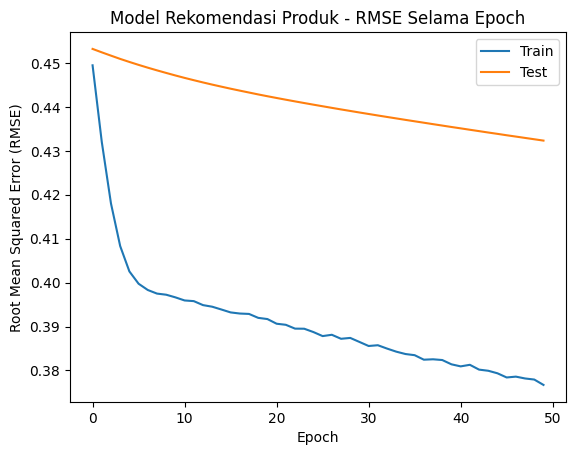

In [54]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Rekomendasi Produk - RMSE Selama Epoch')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Terlihat berdasarkan Grafik RMSE selama epoch menunjukkan bahwa performa model rekomendasi produk, nilai RMSE pada data training turun dari sekitar 0.45 ke 0.37, hal ini menandakan model belajar dengan baik. Sedangkan, nilai RMSE pada data testing turun tidak terlalu signifikan dan tetap stabil di sekitar 0.43, mengindikasikan sedikit overfitting dan keterbatasan generalisasi. Meski demikian, perbedaan antara kurva train dan test tidak terlalu besar, yang menunjukkan bahwa model tidak mengalami overfitting dan model sudah cukup baik.